In [235]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv('ain_diab.csv')

# Drop rows where 'url' starts with 'https://immoneuf.avito.ma/fr/'
df = df[~df['url'].str.startswith('https://immoneuf.avito.ma/fr/')]
df=df.drop(columns=['surface'])
# Clean and extract numeric parts from the 'prix' column
df['prix'] = df['prix'].apply(
    lambda x: re.sub(r"[^\d]", "", str(x)) if pd.notnull(x) else None
    )


# df

# Convert cleaned 'prix' column to numeric
df['prix'] = pd.to_numeric(df['prix'], errors='coerce')

# # Clean and convert other columns
df['chambres'] = pd.to_numeric(df['chambres'], errors='coerce')
df['salle_de_bain'] = pd.to_numeric(df['salle_de_bain'], errors='coerce')
df['surface_habitable'] = pd.to_numeric(df['surface_habitable'], errors='coerce')
df['etage'] = pd.to_numeric(df['etage'], errors='coerce')


# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')


# Print the cleaned 'prix' column
df.columns




/tmp/ipykernel_24942/3362048797.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


Index(['localisation', 'secteur', 'titre', 'prix', 'equipements', 'chambres',
       'salle_de_bain', 'surface_habitable', 'etage', 'url', 'date'],
      dtype='object')

In [236]:
# Group by 'localisation' and 'secteur' and calculate sum, median, and keep the original 'prix' as well
df_grouped = df.groupby(['localisation', 'secteur']).agg({
    'prix': ['sum', 'median', 'first']  # 'first' will return the first occurrence of 'prix'
})

# Rename columns for clarity
df_grouped.columns = ['prix_sum', 'prix_median', 'prix']  # 'prix_first' for the first price in each group

# Reset index for better readability
df_grouped = df_grouped.reset_index()

# Print the column names and the DataFrame to inspect it
print(df_grouped.columns)
print(df_grouped)



Index(['localisation', 'secteur', 'prix_sum', 'prix_median', 'prix'], dtype='object')
   localisation                secteur     prix_sum  prix_median       prix
0    Casablanca                 2 mars  494792531.0    1690000.0  1800000.0
1    Casablanca            abdelmoumen   74573499.0    1385000.0   880000.0
2    Casablanca              ain borja  111993166.0     830000.0   950000.0
3    Casablanca               ain diab  113594748.0     550000.0  1050000.0
4        agadir              abattoirs   14138018.0     704200.0   640000.0
5        agadir                   anza   10271090.0     320000.0   400000.0
6        agadir           centre ville   39156100.0    1295000.0  1600000.0
7           fes                  agdal  165097171.0     820000.0   250000.0
8           fes             ain_amiyer   16246500.0     600000.0   380000.0
9     marrakech  abdelkrim el khattabi   35417499.0    1000000.0   900000.0
10    marrakech            ain_mezouar   36790960.0     640000.0   400000.0
11

** implutation de lignes par groupmenet de ville et secteur **

In [237]:
df['prix'] = df.groupby(['localisation', 'secteur'])['prix'].transform(
    lambda x: x.fillna(x.median())
)
df['chambres'] = df.groupby(['localisation', 'secteur'])['chambres'].transform(
    lambda x: x.fillna(x.median())
)
df['salle_de_bain'] = df.groupby(['localisation', 'secteur'])['salle_de_bain'].transform(
    lambda x: x.fillna(x.median())
)

df['surface_habitable'] = df.groupby(['localisation', 'secteur'])['surface_habitable'].transform(
    lambda x: x.fillna(x.median())
)

df['etage'] = df.groupby(['localisation', 'etage'])['surface_habitable'].transform(
    lambda x: x.fillna(x.median())
)

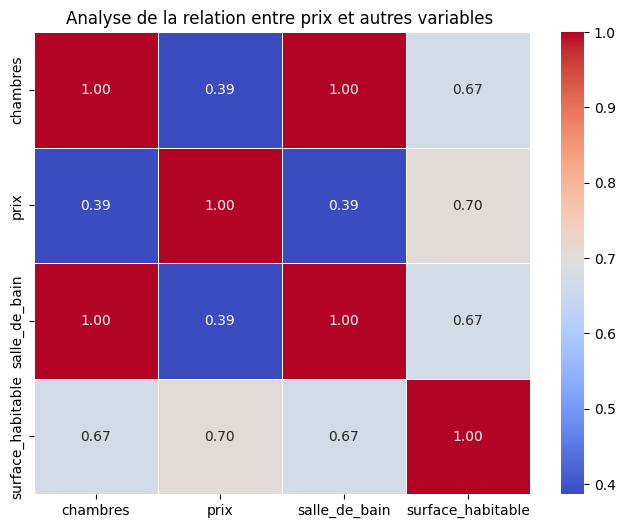

Index(['localisation', 'secteur', 'titre', 'prix', 'equipements', 'chambres',
       'salle_de_bain', 'surface_habitable', 'etage', 'url', 'date'],
      dtype='object')

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# print(df['localisation'])
# Loop over each unique location in 'localisation'
# for i in df['localisation'].unique():
    # Filter the DataFrame by the current location (ville)
df_corr = df[df['secteur'] == 'abdelkrim el khattabi'][[ 'chambres', 'prix', 'salle_de_bain', 'surface_habitable']]
    
    # Calculate the correlation matrix
corr = df_corr.corr()

    # Create the heatmap for each city/ville
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title(f"Analyse de la relation entre prix et autres variables ")
plt.show()
df.columns


In [239]:
df['equipements'].isnull().sum()
df['equipements'].fillna(0)

0                                  Balcon,Meublé,Sécurité
1       Ascenseur,Balcon,Concierge,Cuisine équipée,Par...
3       Ascenseur,Balcon,Chauffage,Climatisation,Conci...
4       Ascenseur,Climatisation,Concierge,Cuisine équi...
6       Ascenseur,Balcon,Climatisation,Concierge,Cuisi...
                              ...                        
2414                                                    0
2415    Ascenseur,Balcon,Chauffage,Climatisation,Conci...
2416    Ascenseur,Balcon,Chauffage,Climatisation,Conci...
2417    Ascenseur,Balcon,Concierge,Cuisine équipée,Par...
2418    Ascenseur,Balcon,Chauffage,Climatisation,Conci...
Name: equipements, Length: 1989, dtype: object

In [240]:

# df=df.drop(columns=['url'])
df
#prix

,localisation,secteur,titre,prix,equipements,chambres,salle_de_bain,surface_habitable,etage,url,date
0,Casablanca,ain diab,Appartement 56m² à vendre,550000.0,"Balcon,Meublé,Sécurité",2.0,2.0,56.0,56.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:52:53
1,Casablanca,ain diab,Appartement de luxe à vendre 100 m² à Casablanca,1050000.0,"Ascenseur,Balcon,Concierge,Cuisine équipée,Par...",2.0,2.0,88.0,88.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 13:59:41
3,Casablanca,ain diab,Appartement Neuf 3 CH 109 m² à Ain sebaa,1110000.0,"Ascenseur,Balcon,Chauffage,Climatisation,Conci...",3.0,3.0,109.0,109.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:58:45
4,Casablanca,ain diab,Appartement à vendre 96 m² à Ain Sebaa Casablanca,990000.0,"Ascenseur,Climatisation,Concierge,Cuisine équi...",2.0,2.0,96.0,96.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:17:57
6,Casablanca,ain diab,Appartement neuf 83 m² à Ain sebaa,959600.0,"Ascenseur,Balcon,Climatisation,Concierge,Cuisi...",2.0,2.0,83.0,83.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:59:55
...,...,...,...,...,...,...,...,...,...,...,...
2414,Casablanca,2 mars,Appartement à vendre 1 m² à Casablanca,1690000.0,NaN,1.0,1.0,1.0,1.0,https://www.avito.ma/fr/2_mars/appartements/Ap...,2023-12-26 13:17:04
2415,Casablanca,2 mars,شقة للبيع بالدار البيضاء 2 مارس,1690000.0,"Ascenseur,Balcon,Chauffage,Climatisation,Conci...",3.0,3.0,1.0,1.0,https://www.avito.ma/fr/2_mars/appartements/%D...,2023-12-26 15:07:16
2416,Casablanca,2 mars,Appartement à Casablanca,2300000.0,"Ascenseur,Balcon,Chauffage,Climatisation,Conci...",3.0,3.0,1.0,1.0,https://www.avito.ma/fr/2_mars/appartements/Ap...,2023-12-24 21:46:06
2417,Casablanca,2 mars,Appartement à vendre 180 m² à Casablanca,2500000.0,"Ascenseur,Balcon,Concierge,Cuisine équipée,Par...",3.0,3.0,180.0,180.0,https://www.avito.ma/fr/2_mars/appartements/Ap...,2023-12-22 11:46:07


In [241]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for encoding
categorical_cols = ['localisation', 'titre', 'equipements']
# Non-categorical columns to keep
non_categorical_cols = df.drop(columns=categorical_cols).columns

# Instantiate the encoder
one_hot_encoder = OneHotEncoder(sparse_output=False)

# Encode the categorical columns
encoded = one_hot_encoder.fit_transform(df[categorical_cols])

# Create a DataFrame for encoded columns
encoded_df = pd.DataFrame(
    encoded,
    columns=one_hot_encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

# Combine encoded and non-categorical columns
df_encoded = pd.concat([df[non_categorical_cols], encoded_df], axis=1)


df_encoded

,secteur,prix,chambres,salle_de_bain,surface_habitable,etage,url,date,localisation_Casablanca,localisation_agadir,...,equipements_Meublé,"equipements_Meublé,Parking,Sécurité",equipements_Parking,"equipements_Parking,Sécurité","equipements_Parking,Sécurité,Terrasse","equipements_Parking,Terrasse",equipements_Sécurité,"equipements_Sécurité,Terrasse",equipements_Terrasse,equipements_nan
0,ain diab,550000.0,2.0,2.0,56.0,56.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:52:53,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ain diab,1050000.0,2.0,2.0,88.0,88.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 13:59:41,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ain diab,1110000.0,3.0,3.0,109.0,109.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:58:45,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ain diab,990000.0,2.0,2.0,96.0,96.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:17:57,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ain diab,959600.0,2.0,2.0,83.0,83.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:59:55,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,2 mars,1690000.0,1.0,1.0,1.0,1.0,https://www.avito.ma/fr/2_mars/appartements/Ap...,2023-12-26 13:17:04,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2415,2 mars,1690000.0,3.0,3.0,1.0,1.0,https://www.avito.ma/fr/2_mars/appartements/%D...,2023-12-26 15:07:16,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2416,2 mars,2300000.0,3.0,3.0,1.0,1.0,https://www.avito.ma/fr/2_mars/appartements/Ap...,2023-12-24 21:46:06,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2417,2 mars,2500000.0,3.0,3.0,180.0,180.0,https://www.avito.ma/fr/2_mars/appartements/Ap...,2023-12-22 11:46:07,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# Instantiate the StandardScaler
maxMin_scaler = MinMaxScaler()

# Standardize the features
df_standardized = df_encoded.copy()  # Create a copy to preserve original df
df_standardized[['prix', 'surface_habitable']] = maxMin_scaler.fit_transform(df_encoded[['prix','surface_habitable']])

# Print the standardized DataF
df_standardized


,secteur,prix,chambres,salle_de_bain,surface_habitable,etage,url,date,localisation_Casablanca,localisation_agadir,...,equipements_Meublé,"equipements_Meublé,Parking,Sécurité",equipements_Parking,"equipements_Parking,Sécurité","equipements_Parking,Sécurité,Terrasse","equipements_Parking,Terrasse",equipements_Sécurité,"equipements_Sécurité,Terrasse",equipements_Terrasse,equipements_nan
0,ain diab,0.004583,2.0,2.0,0.00055,56.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:52:53,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ain diab,0.008750,2.0,2.0,0.00087,88.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 13:59:41,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ain diab,0.009250,3.0,3.0,0.00108,109.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:58:45,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ain diab,0.008250,2.0,2.0,0.00095,96.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:17:57,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,ain diab,0.007997,2.0,2.0,0.00082,83.0,https://www.avito.ma/fr/ain_sebaa/appartements...,2024-12-05 14:59:55,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,2 mars,0.014083,1.0,1.0,0.00000,1.0,https://www.avito.ma/fr/2_mars/appartements/Ap...,2023-12-26 13:17:04,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2415,2 mars,0.014083,3.0,3.0,0.00000,1.0,https://www.avito.ma/fr/2_mars/appartements/%D...,2023-12-26 15:07:16,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2416,2 mars,0.019167,3.0,3.0,0.00000,1.0,https://www.avito.ma/fr/2_mars/appartements/Ap...,2023-12-24 21:46:06,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2417,2 mars,0.020833,3.0,3.0,0.00179,180.0,https://www.avito.ma/fr/2_mars/appartements/Ap...,2023-12-22 11:46:07,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Modèle de Régression Linéaire Multiple


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
# import xgboost as xgb

# Assuming df_standardized is your DataFrame and you're predicting 'prix' from 'surface_habitable'

# Define the features (X) and target (y)
X = df_standardized[['surface_habitable']]  # Features
y = df_standardized['prix']  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R² Score:", r2_rf)


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge RMSE:", rmse_ridge)
print("Ridge R² Score:", r2_ridge)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso RMSE:", rmse_lasso)
print("Lasso R² Score:", r2_lasso)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN RMSE:", rmse_knn)
print("KNN R² Score:", r2_knn)


Random Forest RMSE: 0.03616882498525587
Random Forest R² Score: -0.00794036680516963
Ridge RMSE: 0.036034106634493794
Ridge R² Score: -0.0004457811546461077
Lasso RMSE: 0.0360341509200953
Lasso R² Score: -0.0004482402343652936
KNN RMSE: 0.03881843112558254
KNN R² Score: -0.1610261365845227


In [258]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and contains the relevant columns
# Create binary target variable for 'has_elevator' based on the 'equipment' column
df['has_elevator'] = df['equipment'].apply(lambda x: 1 if 'ascenseur' in str(x).lower() else 0)

# Checking class distribution
print("Class distribution before SMOTE:")
print(df['has_elevator'].value_counts())

# Features and target
X = df.drop(columns=['has_elevator'])  # Features (excluding the target)
y = df['has_elevator']  # Target variable

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ---------------------------
# 1. Logistic Regression
# ---------------------------
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

# ---------------------------
# 2. Decision Tree
# ---------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# ---------------------------
# 3. Random Forest
# ---------------------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# ---------------------------
# 4. Support Vector Machine (SVM)
# ---------------------------
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return accuracy, precision, recall, f1, auc

logreg_metrics = evaluate_model(y_test, y_pred_logreg)
dt_metrics = evaluate_model(y_test, y_pred_dt)
rf_metrics = evaluate_model(y_test, y_pred_rf)
svm_metrics = evaluate_model(y_test, y_pred_svm)

# Print metrics for each model
print("Logistic Regression:", logreg_metrics)
print("Decision Tree:", dt_metrics)
print("Random Forest:", rf_metrics)
print("SVM:", svm_metrics)

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

# Visualizing confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Elevator', 'Has Elevator'], yticklabels=['No Elevator', 'Has Elevator'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ---------------------------
# Feature Importance from Random Forest
# ---------------------------
feature_importance = rf_model.feature_importances_

# Create a DataFrame for feature importance
features = X.columns
feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_df)

# ---------------------------
# Data Visualization
# ---------------------------
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plot for price vs. surface_habitable
plt.scatter(df['surface_habitable'], df['prix'])
plt.xlabel('Surface Habitable')
plt.ylabel('Prix')
plt.title('Surface Habitable vs. Prix')
plt.show()


KeyError: 'equipment'